# Heart Disease Risk Predictions

## Data Used: UCI Heart Disease Dataset
This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation
     2. Hungarian Institute of Cardiology, Budapest
     3. V.A. Medical Center, Long Beach, CA
     4. University Hospital, Zurich, Switzerland

## Number of Instances: 
####        Database:    # of instances:
          1. Cleveland: 303
          2. Hungarian: 294
          3. Switzerland: 123
          4. Long Beach VA: 200
      
      

# Attribute Information:
      1. age:age in years       
      2. sex:(1 = male; 0 = female)       
      3. cp:chest pain type
          -- Value 1: typical angina
          -- Value 2: atypical angina
          -- Value 3: non-anginal pain
          -- Value 4: asymptomatic
      4. trestbps: resting blood pressure  
      5. chol:cholestoral      
      6. fbs:(fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)    
      7. restecg:
          -- Value 0: normal
          -- Value 1: having ST-T wave abnormality 
          -- Value 2: showing probable or definite left ventricular hypertrophy
      8. thalach:maximum heart rate achieved
      9. exang:exercise induced angina (1 = yes; 0 = no)     
      10. oldpeak:ST depression induced by exercise relative to rest   
      11. slope:the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping     
      12. ca: number of major vessels (0-3) colored by flourosopy        
      13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect 
      14. category:diagnosis of heart disease[0-4]       (the predicted attribute)

# Relevant Information:
     This database contains 76 attributes, but all published experiments
     refer to using a subset of 14 of them.  In particular, the Cleveland
     database is the only one that has been used by ML researchers to 
     this date.  The "goal" field refers to the presence of heart disease
     in the patient.  It is integer valued from 0 (no presence) to 4.
     Experiments with the Cleveland database have concentrated on simply
     attempting to distinguish presence (values 1,2,3,4) from absence (value
     0).  


## Class Distribution:
          Database:    0   1   2   3   4 Total
          Cleveland: 164  55  36  35  13   303
          Hungarian: 188  37  26  28  15   294
        Switzerland:   8  48  32  30   5   123
      Long Beach VA:  51  56  41  42  10   200

In [517]:
import pandas
import numpy
import matplotlib.pyplot as plt

In [518]:
df=pandas.read_csv('Preprocessed/data_combined.csv')
print df[:5]

   AGE  SEX  CP THRESTBPS CHOL FBS RESTECG THALACH EXANG OLDPEAK SLOPE CA  \
0   63    1   1       145  233   1       2     150     0     2.3     3  0   
1   67    1   4       160  286   0       2     108     1     1.5     2  3   
2   67    1   4       120  229   0       2     129     1     2.6     2  2   
3   37    1   3       130  250   0       0     187     0     3.5     3  0   
4   41    0   2       130  204   0       2     172     0     1.4     1  0   

  THAL  CATEGORY  
0    6         0  
1    3         2  
2    7         1  
3    3         0  
4    3         0  


In [519]:
print df.dtypes

AGE           int64
SEX           int64
CP            int64
THRESTBPS    object
CHOL         object
FBS          object
RESTECG      object
THALACH      object
EXANG        object
OLDPEAK      object
SLOPE        object
CA           object
THAL         object
CATEGORY      int64
dtype: object


In [520]:
print df['CATEGORY'].value_counts()

0    411
1    265
2    109
3    107
4     28
Name: CATEGORY, dtype: int64


## Missing Attribute Values(WEKA TOOL)
1. THRESTBPS(6%)
2. RESTECG(2 values)
2. CHOL(3%)
3. FBS(10%)
4. THALAC(6%)
5. EXANG(6%)
5. OLDPEAK(7%)
6. SLOPE(34%)
7. CA(66%)
8. THAL(53%)

## Replacing missing values for THERESTBPS

In [521]:
print df['THRESTBPS'].value_counts().head()

120    131
130    115
140    102
110     59
?       59
Name: THRESTBPS, dtype: int64


In [522]:
#average rest blood pressure is  generally in range 120-140
df['THRESTBPS'] = df['THRESTBPS'].replace(['?'],'120')
df['THRESTBPS'] = df['THRESTBPS'].astype('int64')

## Replacing missing values for FBS

In [523]:
#print df.columns
print df['FBS'].value_counts()
print "male:\n",df[df['SEX']==1]['FBS'].value_counts()
print "Female:\n",df[df['SEX']==0]['FBS'].value_counts()#directly replace with 0

0    692
1    138
?     90
Name: FBS, dtype: int64
male:
0    528
1    119
?     79
Name: FBS, dtype: int64
Female:
0    164
1     19
?     11
Name: FBS, dtype: int64


In [524]:
#randomly filling values with 80% with 0 and 20% with 1s
v=df.FBS.values=='?'
df.loc[v, 'FBS'] = numpy.random.choice(('0','1'), v.sum(), p=(0.8,0.2))
print df['FBS'].value_counts()
df['FBS']=df['FBS'].astype('int64')

0    768
1    152
Name: FBS, dtype: int64


# Replacing missing values in CHOL

In [525]:
df['CHOL'].value_counts().head()
#evenly distributed...
#so will replace with mean of the class

0      172
?       30
254     10
220     10
216      9
Name: CHOL, dtype: int64

In [526]:
df['CHOL']=df['CHOL'].replace('?','-69')#temporarily replacing ? with -69
df['CHOL']=df['CHOL'].astype('int64')
k=int(df[df['CHOL']!=-69]['CHOL'].mean())
df['CHOL']=df['CHOL'].replace(-69,k)


#print df['CHOL'].unique() #completed !--!

## Replacing missing values in RESTECG

In [527]:
print df['RESTECG'].value_counts()

#replacing with max occuring value for attribute
df['RESTECG']=df['RESTECG'].replace('?','0')
#print df['RESTECG'].unique()
#print df['RESTECG'].value_counts()
df['RESTECG'] = df['RESTECG'].astype('int64')



print "after replacing\n",df['RESTECG'].value_counts()

0    551
2    188
1    179
?      2
Name: RESTECG, dtype: int64
after replacing
0    553
2    188
1    179
Name: RESTECG, dtype: int64


## Replacing missing values in THALACH

In [528]:
df['THALACH'].value_counts().head()

?      55
150    43
140    41
120    35
130    30
Name: THALACH, dtype: int64

In [529]:
df['THALACH']=df['THALACH'].replace('?','-69')#temporarily replacing ? with -69
df['THALACH']=df['THALACH'].astype('int64')
k=int(df[df['THALACH']!=-69]['THALACH'].mean())
print k
df['THALACH']=df['THALACH'].replace(-69,k)

137


In [530]:
df['THALACH'].value_counts().head()

137    60
150    43
140    41
120    35
130    30
Name: THALACH, dtype: int64

## Replacing missing values in EXANG

In [531]:
#exang:exercise induced angina (1 = yes; 0 = no) 
print df['EXANG'].value_counts()

0    528
1    337
?     55
Name: EXANG, dtype: int64


In [532]:
k=528.0/(337.0+528.0)
print k

0.610404624277


In [533]:
v=df.EXANG.values=='?'
df.loc[v,'EXANG'] = numpy.random.choice(('0','1'), v.sum(), p=(0.61,0.39))
print df['EXANG'].value_counts()
df['EXANG']=df["EXANG"].astype('int64')

0    565
1    355
Name: EXANG, dtype: int64


## Replacing missing values in OLDPEAK

In [534]:
print df['OLDPEAK'].value_counts().head()

0      370
1       83
2       76
?       62
1.5     48
Name: OLDPEAK, dtype: int64


In [535]:
df['OLDPEAK']=df['OLDPEAK'].replace('?','-69')#temporarily replacing ? with -69
df['OLDPEAK']=df['OLDPEAK'].astype('float64')
k=df[df['OLDPEAK']!=-69]['OLDPEAK'].mean()
print k
df['OLDPEAK']=df['OLDPEAK'].replace(-69,numpy.round(k,1))

0.878787878788


In [536]:
print df['OLDPEAK'].value_counts().head()

0.0    370
1.0     83
2.0     76
0.9     66
1.5     48
Name: OLDPEAK, dtype: int64


## SLOPE

In [537]:
print df['SLOPE'].value_counts()

2    345
?    309
1    203
3     63
Name: SLOPE, dtype: int64


In [538]:
#k=203.0/(345.0+203.0+63.0)
#print k

In [539]:
v=df.SLOPE.values=='?'
df.loc[v,'SLOPE'] = numpy.random.choice(('2','1','3'), v.sum(), p=(0.6,0.30,0.10))
print df['SLOPE'].value_counts()
df['SLOPE']=df['SLOPE'].astype('int64')

2    525
1    299
3     96
Name: SLOPE, dtype: int64


## CA

In [540]:
print df["CA"].value_counts()
k=(41.0)/(181+67+41+20)
print k

?    611
0    181
1     67
2     41
3     20
Name: CA, dtype: int64
0.132686084142


In [541]:
v=df.CA.values=='?'
df.loc[v,'CA'] = numpy.random.choice(('0','1','2','3'), v.sum(), p=(0.60,0.20,0.13,0.07))
df['CA']=df['CA'].astype('int64')
print df['CA'].value_counts()

0    568
1    179
2    112
3     61
Name: CA, dtype: int64


## THAL

In [542]:
print df['THAL'].value_counts()
#can't use random walk directly here

?    486
3    196
7    192
6     46
Name: THAL, dtype: int64


In [543]:
print df[df['THAL']=='3']['SEX'].value_counts()
print df[df['THAL']=='7']['SEX'].value_counts()

1    110
0     86
Name: SEX, dtype: int64
1    171
0     21
Name: SEX, dtype: int64


In [544]:
print "THAL:3=====>\n",df[df['THAL']=='3']['CATEGORY'].value_counts()
print "THAL:7=====>\n",df[df['THAL']=='7']['CATEGORY'].value_counts()
print "THAL:6=====>\n",df[df['THAL']=='6']['CATEGORY'].value_counts()

THAL:3=====>
0    138
1     30
2     14
3     12
4      2
Name: CATEGORY, dtype: int64
THAL:7=====>
1    63
3    43
0    38
2    37
4    11
Name: CATEGORY, dtype: int64
THAL:6=====>
1    13
2    12
0    11
3     7
4     3
Name: CATEGORY, dtype: int64


In [545]:
df['THAL']=df['THAL'].replace('?',-1)
'''
df['THAL']=df['THAL'].replace('?',-1)
for row in df.iterrows():
    if row['THAL']==-1 and row['CATEGORY']>=1:
        df.loc[row.Index, 'ifor'] = 7
        
    elif row['THAL']==-1 and row['CATEGORY']==0:
        df.loc[row.Index, 'ifor'] = 3
'''
df.loc[(df['THAL']==-1)&(df['CATEGORY']!=0),'THAL']='7'
#print df['THAL'].value_counts()
df.loc[(df['THAL']==-1)&(df['CATEGORY']==0),'THAL']='3'
print df['THAL'].value_counts()
df['THAL']=df['THAL'].astype('int64')

7    454
3    420
6     46
Name: THAL, dtype: int64


In [546]:
print df.dtypes

AGE            int64
SEX            int64
CP             int64
THRESTBPS      int64
CHOL           int64
FBS            int64
RESTECG        int64
THALACH        int64
EXANG          int64
OLDPEAK      float64
SLOPE          int64
CA             int64
THAL           int64
CATEGORY       int64
dtype: object


In [547]:
dummies = pandas.get_dummies(df["CP"],prefix="CP")
df = df.join(dummies)

dummies = pandas.get_dummies(df["RESTECG"],prefix="RESTECG")
df      = df.join(dummies)

dummies = pandas.get_dummies(df["SLOPE"],prefix="SLOPE")
df      = df.join(dummies)

dummies = pandas.get_dummies(df["THAL"],prefix="THAL")
df      = df.join(dummies)

#dummies = pandas.get_dummies(df["EXANG"],prefix="EXANG")
#df = df.join(dummies)

#del df['SEX']
del df['CP']
del df['RESTECG']
del df['SLOPE']
del df['THAL']
#del df['EXANG']

In [548]:
print df.dtypes

AGE            int64
SEX            int64
THRESTBPS      int64
CHOL           int64
FBS            int64
THALACH        int64
EXANG          int64
OLDPEAK      float64
CA             int64
CATEGORY       int64
CP_1           uint8
CP_2           uint8
CP_3           uint8
CP_4           uint8
RESTECG_0      uint8
RESTECG_1      uint8
RESTECG_2      uint8
SLOPE_1        uint8
SLOPE_2        uint8
SLOPE_3        uint8
THAL_3         uint8
THAL_6         uint8
THAL_7         uint8
dtype: object


In [549]:
for g in df.columns:
    if df[g].dtype=='uint8':
        df[g]=df[g].astype('int64')

In [550]:
df.dtypes
df.loc[df['CATEGORY']>0,'CATEGORY']=1

In [551]:
stdcols = ["AGE","THRESTBPS","CHOL","THALACH","OLDPEAK"]
nrmcols = ["CA"]
stddf   = df.copy()
stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/x.std())
stddf[nrmcols] = stddf[nrmcols].apply(lambda x: (x-x.min())/(x.max()-x.min()))
#stddf[stdcols] = stddf[stdcols].apply(lambda x: (x-x.mean())/(x.max()-x.min()))


for g in stdcols:
    print g,max(stddf[g]),min(stddf[g])
    
for g in nrmcols:
    print g,max(stddf[g]),min(stddf[g])    

AGE 2.49229867231 -2.70681396757
THRESTBPS 3.67440591791 -7.03102349108
CHOL 3.70670590542 -1.82755513195
THALACH 2.56523324659 -3.08339929343
OLDPEAK 5.04825042025 -3.30258023693
CA 1.0 0.0


In [552]:
print stddf.dtypes

AGE          float64
SEX            int64
THRESTBPS    float64
CHOL         float64
FBS            int64
THALACH      float64
EXANG          int64
OLDPEAK      float64
CA           float64
CATEGORY       int64
CP_1           int64
CP_2           int64
CP_3           int64
CP_4           int64
RESTECG_0      int64
RESTECG_1      int64
RESTECG_2      int64
SLOPE_1        int64
SLOPE_2        int64
SLOPE_3        int64
THAL_3         int64
THAL_6         int64
THAL_7         int64
dtype: object


In [553]:
from sklearn.model_selection import train_test_split


In [554]:
df_copy=stddf.copy()
df_copy=df_copy.drop(['CATEGORY'],axis=1)

dat=df_copy.values
#print dat.shape

print type(dat),dat.shape

<type 'numpy.ndarray'> (920, 22)


In [555]:
labels=df['CATEGORY'].values
print labels[:5],type(labels)

[0 1 1 0 0] <type 'numpy.ndarray'>


In [556]:
print df['CATEGORY'].value_counts()

1    509
0    411
Name: CATEGORY, dtype: int64


In [557]:
x_train,x_test,y_train,y_test=train_test_split(dat,labels, test_size=0.25, random_state=42)

In [558]:
print "x_train:",x_train.shape
print "y_train:",y_train.shape
print
print "x_test:",x_test.shape
print "y_test:",y_test.shape

x_train: (690, 22)
y_train: (690,)

x_test: (230, 22)
y_test: (230,)


In [559]:
#training and testing
#SVM
from sklearn import svm
clfsvm= svm.SVC(gamma=0.001, C=5)
clfsvm.fit(x_train,y_train)
print "SVM:",clfsvm.score(x_test,y_test)*100,"%"
svmpred=clfsvm.predict(x_test)
#print svmpred




#from sklearn.model_selection import cross_val_score
#scores = cross_val_score(clf,dat,labels, cv=5)
#print scores


from sklearn import linear_model
lrcv=linear_model.LogisticRegressionCV(fit_intercept=True,penalty='l2',dual=False)
lrcv.fit(x_train,y_train)
print "Logistic Regression:",lrcv.score(x_test,y_test)*100,"%"


SVM: 89.5652173913 %
Logistic Regression: 88.6956521739 %


Importance of various features
AGE 0.0425005214349
SEX 0.0209324459398
THRESTBPS 0.0365276112325
CHOL 0.0629200171632
FBS 0.0119640642529
THALACH 0.0676923923224
EXANG 0.0678499321429
OLDPEAK 0.041210523927
CA 0.0348150167151
CP_1 0.00914255742067
CP_2 0.0306477759846
CP_3 0.00700040573836
CP_4 0.103558953636
RESTECG_0 0.0127939079927
RESTECG_1 0.014416644744
RESTECG_2 0.0123279676384
SLOPE_1 0.0223094639076
SLOPE_2 0.00730892616285
SLOPE_3 0.00573128023
THAL_3 0.253168772905
THAL_6 0.0161352272832
THAL_7 0.119045591225


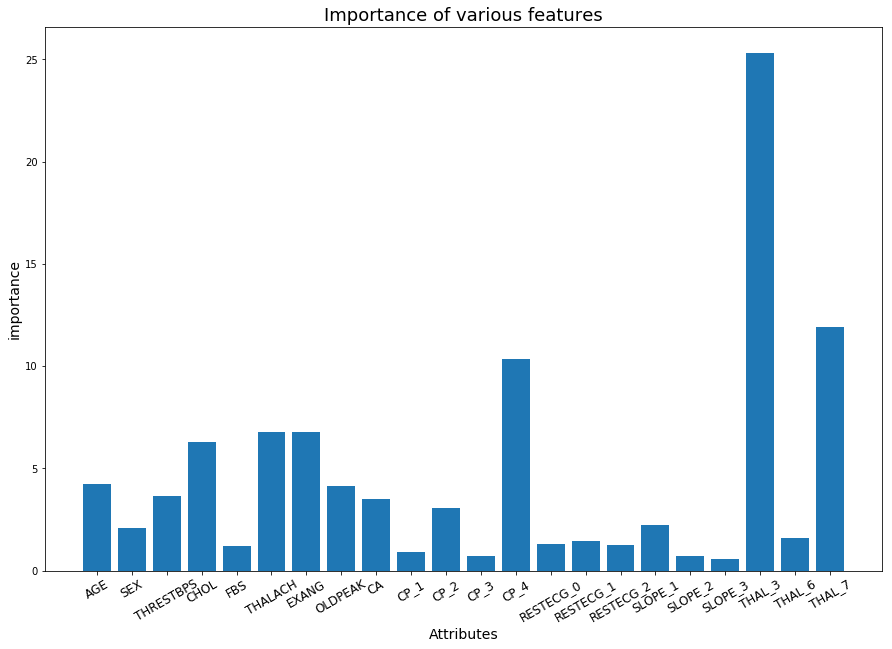

after feature sel SVM: 90.0 %
Logistic Regression: 90.0 %


In [560]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier()
clf = clf.fit(dat,labels)
g=clf.feature_importances_
c=stddf.drop(['CATEGORY'],axis=1).columns

print "Importance of various features"
for k in range(len(c)):
    print c[k],g[k]

g=g*100    
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] =[15,10]

index = numpy.arange(len(c))
plt.bar(index,g)
plt.xlabel('Attributes', fontsize=14)
plt.ylabel('importance', fontsize=14)
plt.xticks(index,c, fontsize=12, rotation=30)
plt.title('Importance of various features',fontsize=18)
plt.show()
    
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(dat)
#print X_new.shape


tx_train,tx_test,ty_train,ty_test=train_test_split(X_new,labels, test_size=0.25, random_state=42)


tclf = svm.SVC(gamma=0.001, C=5)
tclf.fit(tx_train,ty_train)
print "after feature sel SVM:",tclf.score(tx_test,ty_test)*100,"%"
tsvmpred=tclf.predict(tx_test)
#print tsvmpred


tlrcv=linear_model.LogisticRegressionCV(fit_intercept=True,penalty='l2',dual=False)
tlrcv.fit(tx_train,ty_train)
print "Logistic Regression:",tlrcv.score(tx_test,ty_test)*100,"%"


In [561]:
import keras 
import tensorflow
%matplotlib inline
from sklearn import metrics
import matplotlib.pyplot as plt # side-stepping mpl backend
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers.core import Dropout, Flatten, Activation, Dense
import math

In [562]:
def make_model(activ,opti,ip,layers,trainx,trainy,testx,testy):
    model = Sequential()
    model.add(Dense(layers[0], input_dim=ip, init='uniform', activation=activ))
    model.add(Dense(layers[1], init='uniform', activation=activ))
    model.add(Dense(1, init='uniform', activation=activ))
    model.compile(loss='mean_squared_logarithmic_error', optimizer=opti, metrics=['accuracy'])
    model.fit(trainx,trainy,epochs=600,batch_size=512,verbose=2,validation_data=(testx,testy))
    
    trainScore = model.evaluate(trainx,trainy, verbose=0)
    print "Train Score: ",100-trainScore[0]*100
    testScore = model.evaluate(testx,testy, verbose=0)
    print "Test Score: ",100-testScore[0]*100
    
    return model
    
    
    
    

In [563]:
#without k best features,sigmoid and rmsprop
m1=make_model('sigmoid','rmsprop',x_train.shape[1],[x_train.shape[1],16],x_train,y_train,x_test,y_test)

/home/siddharth/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(22, activation="sigmoid", kernel_initializer="uniform", input_dim=22)`
  app.launch_new_instance()
/home/siddharth/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="sigmoid", kernel_initializer="uniform")`
/home/siddharth/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


Train on 690 samples, validate on 230 samples
Epoch 1/600
0s - loss: 0.1196 - acc: 0.4565 - val_loss: 0.1170 - val_acc: 0.4174
Epoch 2/600
0s - loss: 0.1194 - acc: 0.4565 - val_loss: 0.1171 - val_acc: 0.4174
Epoch 3/600
0s - loss: 0.1193 - acc: 0.4565 - val_loss: 0.1171 - val_acc: 0.4174
Epoch 4/600
0s - loss: 0.1193 - acc: 0.4565 - val_loss: 0.1171 - val_acc: 0.4174
Epoch 5/600
0s - loss: 0.1193 - acc: 0.4565 - val_loss: 0.1171 - val_acc: 0.4174
Epoch 6/600
0s - loss: 0.1192 - acc: 0.4565 - val_loss: 0.1172 - val_acc: 0.4174
Epoch 7/600
0s - loss: 0.1192 - acc: 0.4565 - val_loss: 0.1172 - val_acc: 0.4174
Epoch 8/600
0s - loss: 0.1192 - acc: 0.4565 - val_loss: 0.1173 - val_acc: 0.4174
Epoch 9/600
0s - loss: 0.1191 - acc: 0.4565 - val_loss: 0.1174 - val_acc: 0.4174
Epoch 10/600
0s - loss: 0.1191 - acc: 0.4565 - val_loss: 0.1173 - val_acc: 0.4174
Epoch 11/600
0s - loss: 0.1191 - acc: 0.4565 - val_loss: 0.1174 - val_acc: 0.4174
Epoch 12/600
0s - loss: 0.1190 - acc: 0.4565 - val_loss: 0.11

In [564]:
pr=m1.predict(x_test)
u=0
k=0
tp=0
p=0
for u in range(len(x_test)):
    if round(pr[u][0],1)>=0.3 and round(pr[u][0],1)<=0.8:
        g=svmpred[u]
    else:
        g=round(pr[u][0],0)
    if g!=y_test[u]:    
        #print "expected",y_test[u],"predicted:",pr[u][0]," ",svmpred[u]
        k=k+1
    if g==1:
        p=p+1
        if y_test[u]==1:
            tp=tp+1
#print "error",k*100/len(y_test),"%"
print "precision model 1:",tp*100/p

precision model 1: 91


In [565]:
print tx_train.shape

(690, 6)


In [566]:
m2=make_model('sigmoid','rmsprop',tx_train.shape[1],[tx_train.shape[1]*10,16],tx_train,ty_train,tx_test,ty_test)

/home/siddharth/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(60, activation="sigmoid", kernel_initializer="uniform", input_dim=6)`
  app.launch_new_instance()
/home/siddharth/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, activation="sigmoid", kernel_initializer="uniform")`
/home/siddharth/miniconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`


Train on 690 samples, validate on 230 samples
Epoch 1/600
0s - loss: 0.1196 - acc: 0.4565 - val_loss: 0.1171 - val_acc: 0.4174
Epoch 2/600
0s - loss: 0.1193 - acc: 0.4565 - val_loss: 0.1172 - val_acc: 0.4174
Epoch 3/600
0s - loss: 0.1192 - acc: 0.4565 - val_loss: 0.1172 - val_acc: 0.4174
Epoch 4/600
0s - loss: 0.1192 - acc: 0.4565 - val_loss: 0.1173 - val_acc: 0.4174
Epoch 5/600
0s - loss: 0.1192 - acc: 0.4565 - val_loss: 0.1173 - val_acc: 0.4174
Epoch 6/600
0s - loss: 0.1191 - acc: 0.4565 - val_loss: 0.1174 - val_acc: 0.4174
Epoch 7/600
0s - loss: 0.1191 - acc: 0.4565 - val_loss: 0.1175 - val_acc: 0.4174
Epoch 8/600
0s - loss: 0.1191 - acc: 0.4565 - val_loss: 0.1174 - val_acc: 0.4174
Epoch 9/600
0s - loss: 0.1190 - acc: 0.4565 - val_loss: 0.1173 - val_acc: 0.4174
Epoch 10/600
0s - loss: 0.1190 - acc: 0.4565 - val_loss: 0.1173 - val_acc: 0.4174
Epoch 11/600
0s - loss: 0.1190 - acc: 0.4565 - val_loss: 0.1174 - val_acc: 0.4174
Epoch 12/600
0s - loss: 0.1190 - acc: 0.4565 - val_loss: 0.11

In [567]:
pr=m2.predict(tx_test)
#print(pr)
u=0
k=0
tp=0
p=0
for u in range(len(tx_test)):
    if round(pr[u][0],1)>=0.2 and round(pr[u][0],1)<=0.75:
        g=tsvmpred[u]
    else:
        g=round(pr[u][0],0)
    if g!=ty_test[u]:    
        #print "expected",ty_test[u],"predicted:",pr[u][0]," ",tsvmpred[u]
        k=k+1
    if g==1:
        p=p+1
        if y_test[u]==1:
            tp=tp+1
#print "error",k*100/len(y_test),"%"
print "precision model 2:",tp*100/p

precision model 2: 93


## Precision for various classifier

In [577]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,clfsvm.predict(x_test)).ravel()
print "True Negative",tn
print "False Positive",fp
print "False Negative",fn
print "True Positive",tp


print "precision svm:",tp*100/(tp+fp)

True Negative 85
False Positive 11
False Negative 13
True Positive 121
precision svm: 91


In [576]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test,lrcv.predict(x_test)).ravel()
print "True Negative",tn
print "False Positive",fp
print "False Negative",fn
print "True Positive",tp


print "precision logistics:",tp*100/(tp+fp)

True Negative 83
False Positive 13
False Negative 13
True Positive 121
precision logistics: 90


In [578]:
from sklearn.metrics import confusion_matrix#svm with selected features
tn, fp, fn, tp = confusion_matrix(y_test,tclf.predict(tx_test)).ravel()
print "True Negative",tn
print "False Positive",fp
print "False Negative",fn
print "True Positive",tp


print "precision t_svm:",tp*100/(tp+fp)

print 
print

from sklearn.metrics import confusion_matrix#logistics with selected features
tn, fp, fn, tp = confusion_matrix(y_test,tlrcv.predict(tx_test)).ravel()
print "True Negative",tn
print "False Positive",fp
print "False Negative",fn
print "True Positive",tp


print "precision t_lrcv:",tp*100/(tp+fp)

True Negative 87
False Positive 9
False Negative 14
True Positive 120
precision t_svm: 93


True Negative 86
False Positive 10
False Negative 13
True Positive 121
precision t_lrcv: 92


## precision with important feature selected SVM is best

In [571]:
clf

clftree = ExtraTreesClassifier()
clftree.fit(x_train,y_train)
clftree.score(x_test,y_test)

0.87391304347826082

# Trying ensemble techniques to get some improvement

In [572]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier



seed = 42
num_trees = 100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = GradientBoostingClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model,dat,labels, cv=kfold)
results.mean()

0.87065217391304339

In [573]:
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier
seed = 42
num_trees =100
kfold = model_selection.KFold(n_splits=10, random_state=seed)
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model,dat,labels, cv=kfold)
results.mean()

0.85760869565217401

In [574]:
import pandas
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier

seed = 42
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cart = svm.SVC(gamma=0.001, C=100)
num_trees = 64
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model,dat,labels, cv=kfold)
print(results.mean())

0.88152173913


# conclusion

### SVM with selected features has the best precision of 93%.(accuracy 90%)
### Neural n/w with the sigmoid activation and important features has a precision of 93%(accuracy of ~96.%)

In [575]:
#todo

#pickel the model and complete the UI to take input